(qiskit)=

# Qiskit

Автор(ы):

- [Синченко Семен](https://github.com/SemyonSinchenko)


В этой лекции мы посмотрим, как при помощи библиотеки `Qiskit` можно работать с кубитами и квантовыми схемами.

```{warning}
Во всех дальнейших лекциях мы будем, за редким исключением, использовать в основном библиотеку `PennyLane`, так что данная лекция исключительно обзорная и факультативная. В ней мы поверхностно познакомимся с концептами `Qiskit` и напишем пару примеров по работе с кубитами. Обзор экосистемы `Qiskit`, включая `qiskit-machine-learning` выходит за рамки этой лекции, но в конце мы дадим несколько ссылок для самостоятельного изучения.
```

## Кубиты

### Импорты

In [1]:
from qiskit import QuantumCircuit
from qiskit.providers.aer import QasmSimulator

from qiskit import version
print(f"Qiskit version: {version.get_version_info()}")

Qiskit version: 0.18.3


### Симулятор

Для запуска мы будем использовать симулятор квантового компьютера `QasmSimulator`:

In [2]:
simulator = QasmSimulator()

В `Qiskit` поддерживается несколько симуляторов, например:

- [UnitarySimulator](https://qiskit.org/documentation/stubs/qiskit.providers.aer.UnitarySimulator.html#qiskit.providers.aer.UnitarySimulator) -- симулятор унитарной динамики идеальной схемы;
- [StatevectorSimulator](https://qiskit.org/documentation/stubs/qiskit.providers.aer.StatevectorSimulator.html#qiskit.providers.aer.StatevectorSimulator) -- симулятор волновой функции идеальной схемы;
- [QasmSimulator](https://qiskit.org/documentation/stubs/qiskit.providers.aer.QasmSimulator.html#qiskit.providers.aer.QasmSimulator) -- симулятор, который моделирует шумы;

Мы использовали лишь один из них. В целом, модуль `qiskit.providers` предоставляет базовые абстракции, которые позволяют запускать наш код на разных backend, включая реальные квантовые компьютеры, просто поменяв одну строчку в коде.

### Квантовая схема

Ключевым элементом в `Qiskit` является квантовая схема -- экземпляр класса `QuantumCircuit`. Создадим такую схему:

In [3]:
circuit = QuantumCircuit(2, 2)

В `Qiskit` необходимо явно указывать не только количество кубитов, которые нам необходимы, но также и количество классических битов, которые необходимы будут нам для измерений. В данном случае мы создали квантовую схему с двумя кубитами и двумя битами.

## Квантовые гейты

Давайте попробуем воспроизвести функцию `make_entanglement` из [лекции про `Pennylane`](../../prog/ru/pennylane.html#qnode). Применим [гейт Адамара](../../qc/ru/qubit.html#id20) к первому кубиту, а потом применим [гейт CNOT (CX)](../../qc/ru/gates.html#cnot-cx):

In [4]:
circuit.h(0)
circuit.cx(0, 1)

И добавим шаг измерений:

In [5]:
circuit.measure([0,1], [0,1])

### Компиляция и запуск схемы

Квантовые схемы `Qiskit` должны быть скомпилированы в инструкции [квантового ассемблера](../../prog/ru/progreview.html#openqasm). Для этого используется функция `transpile`:

In [6]:
from qiskit import transpile

compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(compiled_circuit)

print(f"Number of '00': {counts['00']}")
print(f"Number of '11': {counts['11']}")

Number of '00': 516
Number of '11': 484


Мы получили результат, аналогичный [полученному в лекции про `Pennylane`](../../prog/ru/pennylane.html#qnode): вероятности получения результата $\ket{00}$ и $\ket{11}$ равны $\sim 0.5$, а другие результаты мы получить не можем.

## Визуализация

В `Qiskit` есть очень мощные средства визуализации как результатов измерений, так и самих квантовых схем. Например, мы можем посмотреть результаты измерения `counts` в виде графика:

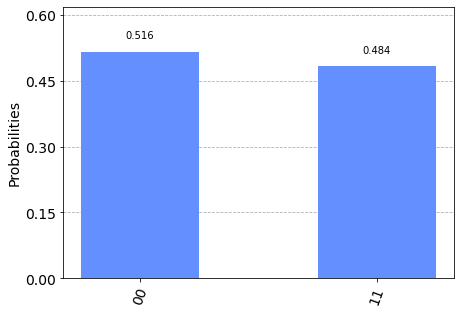

In [7]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

А также визуализировать саму квантовую схему:

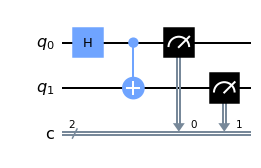

In [8]:
circuit.draw(output="mpl")

В данном случае мы использовали `MatplotlibDrawe`, который позволяет делать очень красивые и легко читаемые визуализации квантовых схем -- это одна из причин почему `Qiskit` часто используют в курсах по основам квантовых вычислений.

## Экосистема Qiskit

Для более подробного изучения всей экосистемы `Qiskit` мы рекомендуем [онлайн книгу](https://qiskit.org/textbook/what-is-quantum.html), которая также является прекрасным источником для изучения базовых и продвинутых квантовых алгоритмов. Для знакомства со средствами для квантового машинного обучения можно также изучить [документацию библиотеки `qiskit-machine-learning`](https://qiskit.org/documentation/machine-learning/getting_started.html#installation), в которой представлены высокоуровневые API для таких вещей, как, например, [квантовый  SVM](https://qiskit.org/documentation/machine-learning/stubs/qiskit_machine_learning.algorithms.QSVC.html#qiskit_machine_learning.algorithms.QSVC), или [квантовая Generative Adversarial Network](https://qiskit.org/documentation/machine-learning/stubs/qiskit_machine_learning.algorithms.QGAN.html#qiskit_machine_learning.algorithms.QGAN).